# coordinate frames

## Exercise 2.1

In [16]:
import sympy as sp

theta = sp.symbols('theta')
phi = sp.symbols('phi')

# rotation matrix about z-axis by theta angle 
R_z = sp.Matrix([[sp.cos(theta), -sp.sin(theta), 0],
                 [sp.sin(theta),  sp.cos(theta), 0],
                 [0,              0,             1]])

# rotation along x-axis by phi angle
R_x = sp.Matrix([[1, 0,              0             ],
                 [0, sp.cos(phi), -sp.sin(phi)],
                 [0, sp.sin(phi),  sp.cos(phi)]])

# combined rotation matrix
R = R_x * R_z 

In [17]:
R

Matrix([
[         cos(theta),         -sin(theta),         0],
[sin(theta)*cos(phi), cos(phi)*cos(theta), -sin(phi)],
[sin(phi)*sin(theta), sin(phi)*cos(theta),  cos(phi)]])

## Exercise 2.2

In [ ]:
# 1. rotation matrix about y-axis by theta angle
theta = 30 * sp.pi / 180  # 30 degrees in radians
R_y = sp.Matrix([[ sp.cos(theta), 0, sp.sin(theta)],
                 [ 0,             1, 0            ],
                 [-sp.sin(theta), 0, sp.cos(theta)]])

# 2. rotation along x-axis by phi angle
phi = 45 * sp.pi / 180  # 45 degrees in radians
R_x = sp.Matrix(
    [[1, 0, 0], [0, sp.cos(phi), -sp.sin(phi)], [0, sp.sin(phi), sp.cos(phi)]]
)

# overall rotation matrix for 
R = R_x * R_y

In [25]:
R


Matrix([
[ sqrt(3)/2,         0,        1/2],
[ sqrt(2)/4, sqrt(2)/2, -sqrt(6)/4],
[-sqrt(2)/4, sqrt(2)/2,  sqrt(6)/4]])

## Exercise 2.3

In [26]:
# 1. rotation along z-axis by theta angle
theta = sp.symbols('theta')
R_z = sp.Matrix([[sp.cos(theta), -sp.sin(theta), 0],
                 [sp.sin(theta),  sp.cos(theta), 0],
                 [0,              0,             1]])

# 2. rotation along x-axis by phi angle
phi = sp.symbols('phi')
R_x = sp.Matrix([[1, 0,              0             ],
                 [0, sp.cos(phi), -sp.sin(phi)],
                 [0, sp.sin(phi),  sp.cos(phi)]])

# rotate frame B to frame A 
R_B_to_A = R_z * R_x

In [27]:
R_B_to_A


Matrix([
[cos(theta), -sin(theta)*cos(phi),  sin(phi)*sin(theta)],
[sin(theta),  cos(phi)*cos(theta), -sin(phi)*cos(theta)],
[         0,             sin(phi),             cos(phi)]])

## Exercise 2.5

$$
{}^A_BR
$$

is a **3×3 rotation matrix** with **eigenvalues**
$$
1,\ e^{+ai},\ e^{-ai}, \qquad \text{where } i = \sqrt{-1}.
$$

What is the physical significance of the eigenvector associated with the eigenvalue 1?

Recall the properties of rotation matrices:
- Determinant is 1.
- Orthogonal: ${}^A_BR^{-1} = {}^A_BR^T$.
- Eigenvalues are of the form $1, e^{i\theta}, e^{-i\theta}$.

- The eigenvalue 1 corresponds to a real eigenvector that lies along the rotation axis.
- The complex eigenvalues correspond to rotation in the plane perpendicular to that axis.

Recall that for eigenvector $v$ and eigenvalue $\lambda$, we have:
$$
{}^A_BR v = \lambda v.
$$
- The eigenvalue 1 means that the vector $v$ is unchanged by the rotation.

### Exercise 2.6

Derive Rodrigues’ rotation formula

We want to derive the rotation matrix $R_K (\theta)$ that rotates any vector $v$ about a unit axis $k$ by an angle $\theta$.

Let  
$$
\hat{K} = 
\begin{bmatrix}
k_x\\ k_y\\ k_z
\end{bmatrix},
\qquad
\|\hat{K}\| = 1
$$

and we want to find $R_K(\theta)$ such that

$$
\mathbf{v}_{rot} = R_K(\theta) \, \mathbf{v}
$$

Step 1: Decompose the vector $\mathbf{v}$

We decompose the vector $\mathbf{v}$ into components parallel and perpendicular to the axis $\hat{K}$:

1. **Parallel** to the axis:  
   $\mathbf{v}_\parallel = (\hat{K}\hat{K}^T)\mathbf{v}$

2. **Perpendicular** to the axis:  
   $\mathbf{v}_\perp = \mathbf{v} - \mathbf{v}_\parallel = (I - \hat{K}\hat{K}^T)\mathbf{v}$

Geometrically:
- The parallel part doesn’t change under rotation.
- The perpendicular part rotates in the plane orthogonal to $\hat{K}$.

Step 2: Rotate the perpendicular component

A rotation of angle \(\theta\) in the plane orthogonal to \(\hat{K}\) gives:

$$
\mathbf{v}_{rot} = 
\mathbf{v}_\parallel
+ \cos\theta\,\mathbf{v}_\perp 
+ \sin\theta\,(\hat{K} \times \mathbf{v}_\perp)
$$

But since $\hat{K} \times \mathbf{v}_\parallel = 0$,
we can simply write:

$$
\mathbf{v}_{rot} = 
\cos\theta\,\mathbf{v}
+ (1 - \cos\theta)(\hat{K}\hat{K}^T)\mathbf{v}
+ \sin\theta\,[\hat{K}_\times]\mathbf{v}
$$

where $[\hat{K}_\times]$ is the **skew-symmetric matrix** for the cross product:

$$
[\hat{K}_\times] =
\begin{bmatrix}
0 & -k_z & k_y \\
k_z & 0 & -k_x \\
-k_y & k_x & 0
\end{bmatrix}
$$

# Denavit–Hartenberg (DH) parameterization

The Denavit–Hartenberg (DH) convention is a systematic way to describe the relative position and orientation between consecutive links in a robot manipulator (or any serial chain of rigid bodies).

It converts a complex chain of rotations and translations into a sequence of simple geometric transformations, parameterized by four quantities per joint.

## The Four DH Parameters

For each link \(i\), four parameters define the transformation from frame \(i-1\) (the previous link) to frame \(i\):

| Symbol | Parameter Name | Geometric Interpretation |
|:--------|:------------------|:-------------------------------------------------------------|
| $a_i$ | **Link length** | Distance between $Z_{i-1}$ and $Z_i$ measured along $X_i$ |
| $α_i$ | **Link twist** | Angle between $Z_{i-1}$ and $Z_i$ measured about $X_i$ |
| $d_i$ | **Link offset** | Distance from $X_{i-1}$ to $X_i$ measured along $Z_{i-1}$ |
| $θ_i$ | **Joint angle** | Angle between $X_{i-1}$ and $X_i$ measured about $Z_{i-1}$ |

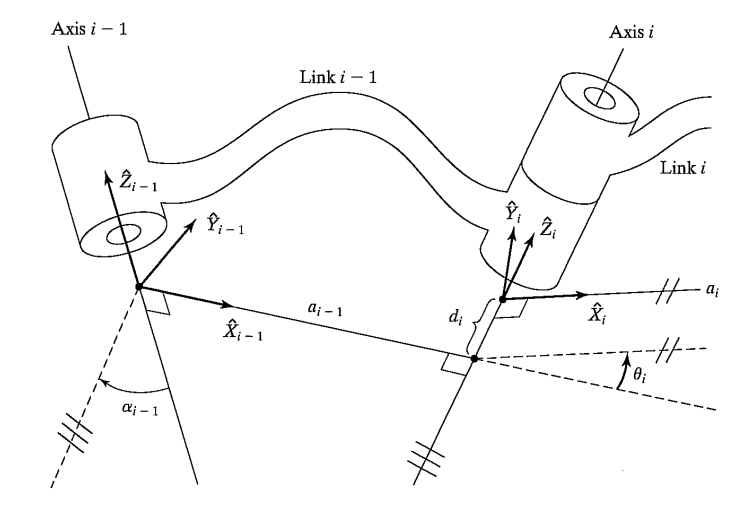


## Define the frame of each link

Each link (or joint) in the robot has its own local coordinate frame $(X_i, Y_i, Z_i)$:

- $Z_i$ always align with the axis of motion (the joint axis)
- $X_i$ points along the common normal between $Z_{i-1}$ and $Z_i$
- $Y_i$ is determined by the right-hand rule to complete the right-handed coordinate system ($Y = Z \times X$)

## Step by step DH frame assignment procedure (3D)

### Step 1: Identify the joint axes
- For every joint $i$, draw the **joint axis** — this defines the direction of $Z_i$.
- If the joint is **revolute**, $Z_i$ is the **axis about which rotation occurs**.  
- If the joint is **prismatic**, $Z_i$ is the **axis along which translation occurs**.

So, $Z_i$ represents the **motion direction** of joint $i$.


### Step 2: Find the common normals between joint axes

- Between two neighboring axes $Z_{i-1}$ and $Z_i$, find their **common normal line** — the shortest line that’s perpendicular to both.
- The **$X_i$** axis lies **along this common normal** from $Z_{i-1}$ to $Z_i$.
- The **length** of that common normal is the **link length** $a_i$.

> If the two axes intersect, then there’s no unique common normal — in this case, $X_i$ is chosen **perpendicular to the plane formed by $Z_{i-1}$ and $Z_i$**.


### Step 3: Define the Origin

- Place the **origin $O_i$** at the intersection of:
  - $Z_i$, and
  - the common normal (or its extension) to $Z_{i-1}$.

So the origin sits where those relationships are best captured geometrically.


### Step 4: Assign $Y_i$ using the right-hand rule

Once $X_i$ and $Z_i$ are defined:
- Point your right-hand fingers from $X_i$ to $Z_i$,
- Your thumb now points along **$Y_i$**.

Thus $Y_i = Z_i \times X_i$.


### Step 5: Measure the DH parameters

described earlier:

In [3]:
import numpy as np

def dh_transformation_matrix(a, alpha, d, theta):
    """
    Compute the Denavit-Hartenberg homogeneous transformation matrix.

    Parameters:
        a (float): Link length (distance along x_i)
        alpha (float): Link twist (angle about x_i)
        d (float): Link offset (distance along z_{i-1})
        theta (float): Joint angle (rotation about z_{i-1})

    Returns:
        np.ndarray: 4x4 homogeneous transformation matrix
    """
    # Precompute cosines and sines for efficiency
    ca = np.cos(alpha)
    sa = np.sin(alpha)
    ct = np.cos(theta)
    st = np.sin(theta)

    # Construct transformation matrix
    T = np.array([
        [ct, -st*ca,  st*sa, a*ct],
        [st,  ct*ca, -ct*sa, a*st],
        [0,   sa,     ca,    d],
        [0,   0,      0,     1]
    ])

    return T

### Example 1: 2-Link Planar Robot Arm (Revolute–Revolute)

Base (Frame 0) ──(θ₁)── Link 1 ──(θ₂)── Link 2 → End Effector

| Link (i) | aᵢ (m) | αᵢ (rad) | dᵢ (m) | θᵢ (rad) |
|-----------|---------|----------|---------|-----------|
| 1 | 1.0 | 0 | 0 | θ₁ |
| 2 | 0.8 | 0 | 0 | θ₂ |

- \(a_1, a_2\): physical lengths of the arm segments  
- \(α_i = 0\): the axes are all parallel (no twist)
- \(d_i = 0\): revolute joints, planar arm (no offset)
- \(θ_1, θ_2\): joint angles (our input variables)

let say θ_1 = 45°, θ_2 = 30°.

In [4]:
# Define DH parameters
a1, alpha1, d1, theta1 = 1.0, 0, 0, np.deg2rad(45)
a2, alpha2, d2, theta2 = 0.8, 0, 0, np.deg2rad(30)

T1 = dh_transformation_matrix(a1, alpha1, d1, theta1)
T2 = dh_transformation_matrix(a2, alpha2, d2, theta2)
T_overall = T1 @ T2

In [7]:
T_overall

array([[ 0.25881905, -0.96592583,  0.        ,  0.91416202],
       [ 0.96592583,  0.25881905,  0.        ,  1.47984744],
       [ 0.        ,  0.        ,  1.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

### Example 2 : 1R-1P (revolute–prismatic) robot

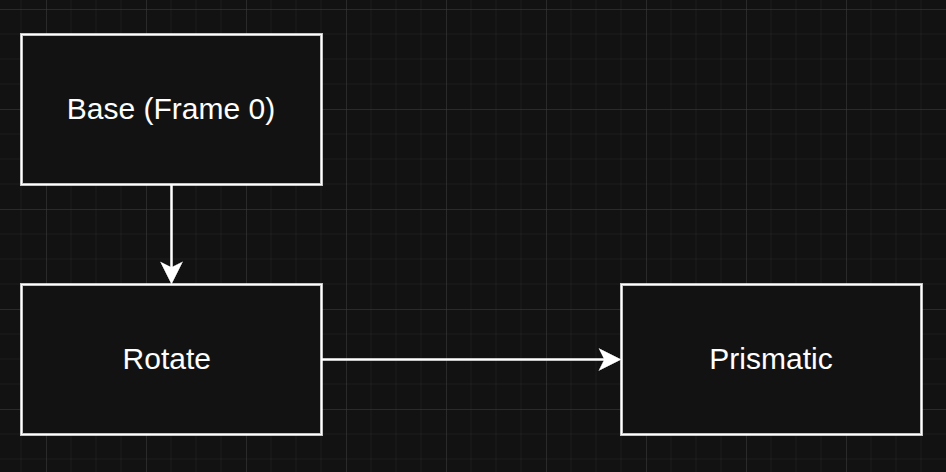

It’s a planar robot that:

- First rotates (revolute joint θ₁),
- Then extends linearly (prismatic joint d₂).

In [14]:
# variables
theta = np.deg2rad(90)  # Joint angle in radians
d = 1.5                 # Joint displacement in meters

# Define DH parameters
a1, alpha1, d1, theta1 = 1.0, 0, 0, theta # Revolute joint
a2, alpha2, d2, theta2 = 0, 0, d, 0 # Prismatic joint

T1 = dh_transformation_matrix(a1, alpha1, d1, theta1)
T2 = dh_transformation_matrix(a2, alpha2, d2, theta2)
T_overall = T1 @ T2


In [15]:
T_overall

array([[ 6.123234e-17, -1.000000e+00,  0.000000e+00,  6.123234e-17],
       [ 1.000000e+00,  6.123234e-17,  0.000000e+00,  1.000000e+00],
       [ 0.000000e+00,  0.000000e+00,  1.000000e+00,  1.500000e+00],
       [ 0.000000e+00,  0.000000e+00,  0.000000e+00,  1.000000e+00]])